In [1]:
#import the data set using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x= data.iloc[:,[3,4]].values

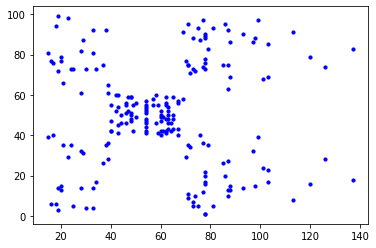

In [4]:
#plot the graph of given dataset
plt.scatter(x[:,0],x[:,1],s=10, c='blue')

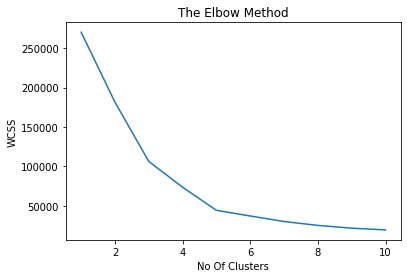

In [5]:
#find the cultest K values
#import the clusters to check the K values
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit_predict(x)
    list1.append(kmeans.inertia_)
plt.plot(range(1,11),list1)
plt.title("The Elbow Method")
plt.xlabel("No Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [26]:
#create the model
from sklearn.cluster import MeanShift
#clusmodel= MeanShift()
#clusmodel
clusmodel= MeanShift(bandwidth=25)
label= clusmodel.fit_predict(x)
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [27]:
supervised= pd.DataFrame(data)

In [28]:
supervised["Cluster Group"]= label

In [29]:
supervised.to_csv("Cluster_MeanShift.csv",index=False)

In [30]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [ ]:
#centroids

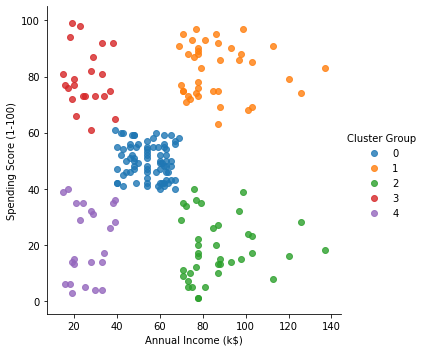

In [32]:
import seaborn as sns
fact= sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend=True,legend_out=True)